# <center> Covid19 Prediction using symptoms
#### Author: C.Koushik

# Importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

# Reading dataset

In [2]:
df=pd.read_csv("covid_symptoms.csv")
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
1,1.0,1.0,0.0,0.0,0.0,0.0,No,Male,Abroad
2,0.0,1.0,0.0,0.0,0.0,0.0,Yes,Male,Contact with confirmed
3,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Abroad
4,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Female,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
211424,0.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Other
211425,0.0,0.0,0.0,0.0,0.0,1.0,No,Male,Other
211426,0.0,0.0,0.0,0.0,0.0,1.0,No,NaN,Other
211427,0.0,0.0,0.0,0.0,0.0,1.0,No,Female,Other


In [3]:
df.head(20)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
1,1.0,1.0,0.0,0.0,0.0,0.0,No,Male,Abroad
2,0.0,1.0,0.0,0.0,0.0,0.0,Yes,Male,Contact with confirmed
3,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Abroad
4,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Female,Contact with confirmed
5,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Contact with confirmed
6,0.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
7,1.0,1.0,1.0,0.0,1.0,0.0,No,Female,Abroad
8,1.0,0.0,1.0,0.0,0.0,0.0,No,Female,Abroad
9,1.0,1.0,1.0,1.0,0.0,0.0,No,Female,Abroad


# Data Preprocessing

### Removing null values


In [4]:
df.isnull().sum()

cough                   243
fever                   243
sore_throat             243
shortness_of_breath     243
head_ache               243
corona_result           243
age_60_and_above        243
gender                 5371
test_indication         243
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

#### There are no null values

In [7]:
np.shape(df)

(206058, 9)

# Distribution of Positive and Negative cases

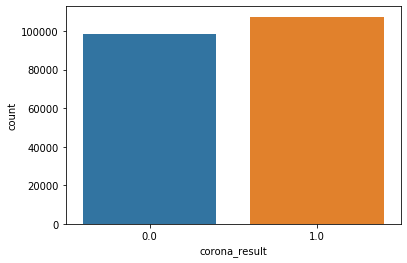

In [8]:
sn.countplot(df["corona_result"])

# Checking for relationship among variables


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result
cough,1.000000,0.405062,0.202896,0.195795,0.220778,0.377659
fever,0.405062,1.000000,0.160196,0.180182,0.247458,0.437327
sore_throat,0.202896,0.160196,1.000000,0.150116,0.282549,0.264471
shortness_of_breath,0.195795,0.180182,0.150116,1.000000,0.162358,0.222676
head_ache,0.220778,0.247458,0.282549,0.162358,1.000000,0.330164
corona_result,0.377659,0.437327,0.264471,0.222676,0.330164,1.000000


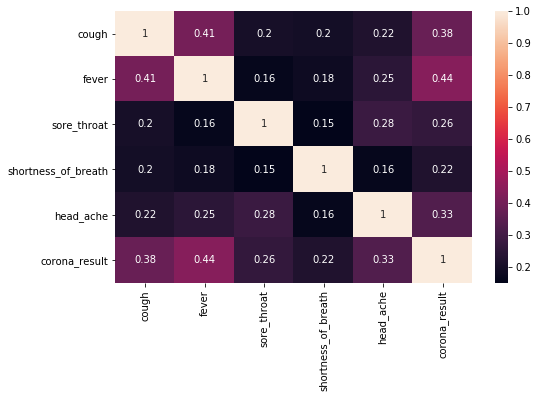

In [9]:
plt.figure(figsize=(8,5))
c=df.corr()
sn.heatmap(c,xticklabels=c.columns,yticklabels=c.columns,annot=True)
c

# Train-Test split 

In [10]:
df.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_60_and_above', 'gender', 'test_indication'],
      dtype='object')

In [11]:
X=df[['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache']]

In [12]:
y=df['corona_result']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7865864311365621

## Confusion matrix

In [17]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[21230,  3472],
       [ 7522, 19291]], dtype=int64)

# KNeighbors classification

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [24]:
y_pred_knn=knn.predict(X_test)

In [25]:
accuracy_score(y_test,y_pred_knn)

0.7312045035426574

# Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc=RandomForestClassifier(criterion='gini',max_depth=4,max_features='sqrt',n_estimators=100)

In [28]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
pred=rfc.predict(X_test)

In [30]:
accuracy_score(y_test,pred)

0.7865864311365621

# Support Vector Classifier

In [31]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
y_pred_svc=svm.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred_svc)

0.7865864311365621